# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [229]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [230]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [231]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [232]:
df_train.shape

(15223, 52)

In [233]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [234]:
df_test.shape

(14910, 52)

In [235]:
df_train.head(100)

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN
5,59911784,0,29,1,0,0,0,0,Среднее,Гражданский брак,...,0,1,2,1,11,0,0,0,0,NaN
6,59911832,0,35,1,0,0,1,1,Высшее,Разведен(а),...,0,1,2,2,14,0,0,0,0,NaN
7,59912034,0,41,1,0,1,0,0,Среднее,Состою в браке,...,1,1,2,1,11,0,0,0,0,NaN
8,59912560,0,53,1,0,0,2,0,Высшее,Состою в браке,...,0,1,1,1,3,0,0,0,0,NaN
9,59912659,0,43,1,0,1,0,0,Среднее специальное,Состою в браке,...,0,1,1,1,6,0,0,0,0,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [236]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [237]:
df = df_test.append(df_train).reset_index(drop=True)

In [238]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [240]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Неполное среднее', 'Два и более высших образования', 'Неоконченное высшее', 'Ученая степень', 'Среднее', 'Высшее', 'Среднее специальное'}


MARITAL_STATUS
{'Разведен(а)', 'Вдовец/Вдова', 'Не состоял в браке', 'Гражданский брак', 'Состою в браке'}


GEN_INDUSTRY
{nan, 'Салоны красоты и здоровья', 'Маркетинг', 'Образование', 'Коммунальное хоз-во/Дорожные службы', 'Энергетика', 'Подбор персонала', 'Строительство', 'Страхование', 'Логистика', 'Банк/Финансы', 'Нефтегазовая промышленность', 'Торговля', 'Сборочные производства', 'Наука', 'Туризм', 'Юридические услуги/нотариальные услуги', 'Ресторанный бизнес/Общественное питание', 'Химия/Парфюмерия/Фармацевтика', 'Управляющая компания', 'Государственная служба', 'СМИ/Реклама/PR-агенства', 'Информационные услуги', 'Металлургия/Промышленность/Машиностроение', 'Сельское хозяйство', 'Другие сферы', 'Недвижимость', 'Здравоохранение', 'ЧОП/Детективная д-ть', 'Развлечения/Искусство', 'Информационные технологии', 'Транспорт'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [241]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [242]:
#В случае с PREVIOUS_CARD_NUM_UTILIZED	количество уже утилизированных карт ( если пусто - 0) можем неопределенные значения поменять на ноль, для остальных данных числового типа можем брать среднее значение по этому столбцу.

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [243]:
#Да, есть. Можем закодировать их с помощью OneHotEncoding

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [244]:
def preproc_data(df_input):
    
    df_output = df_input.copy()
    df_output = df_output.drop(['AGREEMENT_RK','REG_ADDRESS_PROVINCE','FACT_ADDRESS_PROVINCE'], axis=1)
#     df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
#     df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    for i in ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']:
        df_output[i] = df_output[i].map(lambda x: x.replace(',', '.')).astype('float')
    df_output.loc[df_output['PREVIOUS_CARD_NUM_UTILIZED'].isnull(), 'PREVIOUS_CARD_NUM_UTILIZED'] = 0
    for j in df_output.columns:
        if (str(df_train[j].dtype) == 'int64') or (str(df_train[j].dtype) == 'float64'):
            df_output.loc[df_output[j].isnull(), j] = df_output[j].median()
    
    df_output = pd.get_dummies(df_output, columns=['TP_PROVINCE', 'REGION_NM', 'POSTAL_ADDRESS_PROVINCE', 'EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 'FAMILY_INCOME'])
    
    ## Your Code Here
    
    return df_output

In [245]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

In [246]:
# for i in df_train_preproc.columns: # перебираем все столбцы
#     if str(df_test_preproc[i].dtype) == 'float': # если тип столбца - object
#         print('='*10)
#         print(i) # выводим название столбца
#         print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
#         print('\n') # выводим пустую строку
df_train_preproc.head()

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,REG_FACT_FL,FACT_POST_FL,...,FAMILY_INCOME_до 5000 руб.,FAMILY_INCOME_от 10000 до 20000 руб.,FAMILY_INCOME_от 20000 до 50000 руб.,FAMILY_INCOME_от 5000 до 10000 руб.,FAMILY_INCOME_свыше 50000 руб.,FAMILY_INCOME_до 5000 руб.,FAMILY_INCOME_от 10000 до 20000 руб.,FAMILY_INCOME_от 20000 до 50000 руб.,FAMILY_INCOME_от 5000 до 10000 руб.,FAMILY_INCOME_свыше 50000 руб.
14910,0.0,49.0,1.0,0.0,1.0,2.0,1.0,5000.0,1.0,1.0,...,0,1,0,0,0,0,1,0,0,0
14911,0.0,32.0,1.0,0.0,1.0,3.0,3.0,12000.0,1.0,1.0,...,0,1,0,0,0,0,1,0,0,0
14912,0.0,52.0,1.0,0.0,1.0,4.0,0.0,9000.0,1.0,1.0,...,0,1,0,0,0,0,1,0,0,0
14913,0.0,39.0,1.0,0.0,1.0,1.0,1.0,25000.0,0.0,1.0,...,0,0,1,0,0,0,0,1,0,0
14914,0.0,30.0,1.0,0.0,0.0,0.0,0.0,12000.0,1.0,1.0,...,0,1,0,0,0,0,1,0,0,0


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [247]:
y = df_train_preproc['TARGET']
y_test1 = df_test_preproc['TARGET']
X = df_train_preproc.drop('TARGET', axis=1)
X_test1 = df_test_preproc.drop('TARGET', axis=1)

In [248]:
X_test.T

,21229,19162,17233,21806,18209,26662,23049,19893,30073,28959,...,24638,26031,21669,18700,15530,15562,24718,25471,18383,27435
AGE,26.0,59.0,31.0,24.0,29.0,40.0,38.0,29.0,29.0,34.0,...,34.0,29.0,22.0,40.0,52.0,62.0,62.00,56.0,57.0,35.0
SOCSTATUS_WORK_FL,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.00,1.0,1.0,1.0
SOCSTATUS_PENS_FL,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.00,0.0,0.0,0.0
GENDER,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.00,1.0,0.0,0.0
CHILD_TOTAL,0.0,2.0,1.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,2.0,2.0,2.00,0.0,3.0,1.0
DEPENDANTS,0.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,1.0
PERSONAL_INCOME,34000.0,35000.0,8000.0,12000.0,4330.0,15000.0,7000.0,7000.0,13000.0,8000.0,...,7000.0,10000.0,15000.0,20000.0,20000.0,7000.0,7900.00,20000.0,10000.0,12000.0
REG_FACT_FL,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0
FACT_POST_FL,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0
REG_POST_FL,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0


#### Задание 5. Обучение и оценка качества разных моделей

In [249]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
## Your Code Here


In [250]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here
model = DecisionTreeClassifier()                    # инициализируем модель
model.fit(X_train, y_train)                      # обучаем модель
predict1 = model.predict(X_test)                      # делаем предсказание
predict_proba1 = model.predict_proba(X_test)

model = RandomForestClassifier()                    # инициализируем модель
model.fit(X_train, y_train)                      # обучаем модель
predict2 = model.predict(X_test)                      # делаем предсказание
predict_proba2 = model.predict_proba(X_test)

model = LogisticRegression()                    # инициализируем модель
model.fit(X_train, y_train)                      # обучаем модель
predict3 = model.predict(X_test)                      # делаем предсказаниеpredict1
predict_proba3 = model.predict_proba(X_test)


In [302]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

print('DecisionTreeClassifiern')
print('precision', precision_score(y_test, predict1))
print('recall', recall_score(y_test, predict1))
print('accuracy', accuracy_score(y_test, predict1))

print('--------------------------------------------------')
## Your Code Here
print('RandomForestClassifier')
print('precision', precision_score(y_test, predict2))
print('recall', recall_score(y_test, predict2))
print('accuracy', accuracy_score(y_test, predict2))

print('--------------------------------------------------')
print('LogisticRegression')
print('precision', precision_score(y_test, predict3))
print('recall', recall_score(y_test, predict3))
print('accuracy', accuracy_score(y_test, predict3))

print('--------------------------------------------------')

x1 = pd.DataFrame ( [precision_score(y_test, predict1), recall_score(y_test, predict1), recall_score(y_test, predict1)],
                  [precision_score(y_test, predict2), recall_score(y_test, predict2), recall_score(y_test, predict2)],
                  [precision_score(y_test, predict3), recall_score(y_test, predict3), recall_score(y_test, predict3)])

DecisionTreeClassifiern
precision 0.15870570107858242
recall 0.16885245901639345
accuracy 0.790406050955414
--------------------------------------------------
RandomForestClassifier
precision 0.38461538461538464
recall 0.01639344262295082
accuracy 0.8773885350318471
--------------------------------------------------
LogisticRegression
precision 0.5
recall 0.004918032786885246
accuracy 0.8785828025477707
--------------------------------------------------


ValueError: Shape of passed values is (1, 3), indices imply (3, 3)

In [295]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.factorplot( ,data=x1,kind='count');

## Your Code Here

C:\Users\Avo1d\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


TypeError: 'AxesSubplot' object is not iterable

(-0.01, 1.01)

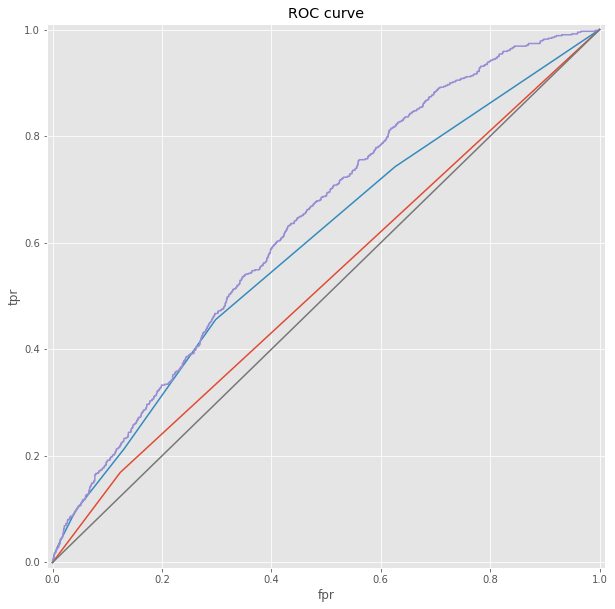

In [252]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr1, tpr1, thresholds = roc_curve(y_test, predict_proba1[:,1])
fpr2, tpr2, thresholds = roc_curve(y_test, predict_proba2[:,1])
fpr3, tpr3, thresholds = roc_curve(y_test, predict_proba3[:,1])
plt.figure(figsize=(10, 10))
plt.plot(fpr1, tpr1)
plt.plot(fpr2, tpr2)
plt.plot(fpr3, tpr3)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
## Your Code Here


In [255]:
roc_auc_score(y_test, predict_proba1[:,1]), roc_auc_score(y_test, predict_proba2[:,1]),roc_auc_score(y_test, predict_proba3[:,1])

(0.522577566164291, 0.5942634092715429, 0.6368443922838658)

In [263]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
rfc = DecisionTreeClassifier()
auc1 = cross_val_score(
    rfc,
    X,
    y,
    scoring='roc_auc',
    cv=10
)
## Your Code Here
auc1.mean()

0.5386951372056159

In [264]:
rfc = RandomForestClassifier()
auc2 = cross_val_score(
    rfc,
    X,
    y,
    scoring='roc_auc',
    cv=10
)
auc2.mean()

0.5949803298606631

In [265]:
rfc = LogisticRegression()
auc3 = cross_val_score(
    rfc,
    X,
    y,
    scoring='roc_auc',
    cv=10
)
auc3.mean()

0.6410885177946815

In [269]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки
model = LogisticRegression()                    # инициализируем модель
model.fit(X_train, y_train)                      # обучаем модель
predict = model.predict(X_test1)                      # делаем предсказаниеpredict1
predict_proba = model.predict_proba(X_test1)
print('LogisticRegression is The_Best_of_the_Best!')
print('precision', precision_score(y_test1, predict))
print('recall', recall_score(y_test1, predict))
print('accuracy', accuracy_score(y_test1, predict))
predict_proba[:,1]

LogisticRegression is The_Best_of_the_Best!
precision 0.1
recall 0.0005714285714285715
accuracy 0.8820925553319919


array([0.16464807, 0.06108495, 0.18156212, ..., 0.18359861, 0.04531169,
       0.18115868])

In [270]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

roc_auc_score(y_test1, predict_proba[:,1])
## Your Code Here

0.6188023447676942

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [1]:
### И далее ;)